In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns
sns.set_theme()

data = pd.read_csv("Gender Classification.csv") # Reading in the Gender Classification dataset as a pandas DataFrame object

## Data
It is important to note that for this model, the dataset was modified to cleary separate the genders. More specifically, the gender column in the dataset was sorted alphabetically in order to easily focus on the female features.

In [2]:
data #looking at the data

,long_hair,Forehead Width (cm),Forehead Height (cm),nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,Gender
0,0,14.0,5.4,0,0,1,0,Female
1,1,13.5,5.9,0,0,0,0,Female
2,0,13.0,5.2,0,0,0,0,Female
3,1,11.9,5.4,1,0,1,1,Female
4,1,12.1,5.4,0,0,0,0,Female
...,...,...,...,...,...,...,...,...
4996,1,12.1,6.2,1,1,1,1,Male
4997,1,14.1,7.0,1,1,1,1,Male
4998,1,12.9,7.0,1,1,1,1,Male
4999,1,12.3,6.9,0,1,1,1,Male


----------------------------------------------------------------------------------------------------------------------------------------------------------
Since we have already manipulated the dataset to distinguish the genders, we will only focus on the first 100 values of gender, that is, the females. Moreover, we will be considering their forehead width as the input (X), and the targets will be their forehead height (y).

In [3]:
X = data.iloc[0:100]["Forehead Width (cm)"]  # storing the desired feature measurement of the first 50 females in X
y = data.iloc[0:100]["Forehead Height (cm)"] # storing the desired gender label of the first 50 females in y

Let's see a visualization of this data, and see if there is a way to approximate the forehead height as a function of the forehead width.

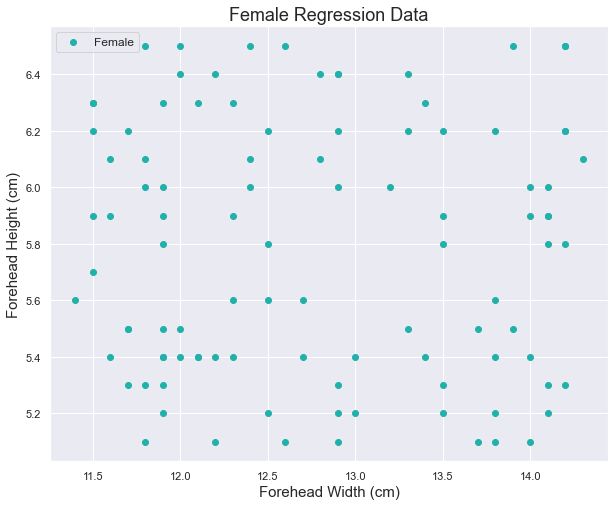

In [4]:
plt.figure(figsize = (10, 8))
plt.scatter(X,
            y,
            color = "lightseagreen",
            label = "Female")
        
plt.xlabel("Forehead Width (cm)", fontsize = 15)
plt.ylabel("Forehead Height (cm)", fontsize = 15)
plt.legend(fontsize = 12)
plt.title("Female Regression Data", fontsize = 18)
plt.show()

Looking at the plot above, it is not clear if there is a way to approximate the forehead height as a function of the forehead width. However, if there is a line that can cut through all the data (in a linearly regressable way), then we may have a rough approximation (target function) of the females forehead height based on their forehead width measurements.  

----------------------------------------------------------------------------------------------------------------------------------------------------------
Moving forward, we must recall that the choice of activation function determines what the model will do, such as classification or regression, in relation with the problem or task we are trying to answer or complete, respectively. 

In this case, since we are trying to predict a linear fucntion, we will use a linear activation function. Additionally, we will use the Mean Squared Error cost function. 

![Mean Square Error](https://www.google.com/search?q=mean+squared+error+cost+activation+function&tbm=isch&ved=2ahUKEwja7fjIv8f3AhVEVTUKHSd8DcoQ2-cCegQIABAA&oq=mean+squared+error+cost+activation+function&gs_lcp=CgNpbWcQA1DqBVjhXWCIX2gAcAB4AIABUogBuw6SAQIzMJgBAKABAaoBC2d3cy13aXotaW1nwAEB&sclient=img&ei=D09zYpqqHsSq1QGn-LXQDA&bih=750&biw=1536&rlz=1C1VDKB_enUS972US972)

In [8]:
class Single_Neuron(object): # class used to represent a single artificial neuron. 
       
    def __init__(self, activation_function): # method used for intialization of data member(s) -- In this case, activation function
        self.activation_function = activation_function

    """"
    Attributes
    ----------
    activation_function : function
        The activation function applied to the preactivation linear combination.

    weights : numpy.ndarray
        The weights and bias of the single neuron. The last entry being the bias. 
        This attribute is created when the train method is called.

    errors_: list
        A list containing the mean sqaured error computed after each iteration 
        of stochastic gradient descent per epoch. 
    """    
    
    
    def train(self, X, y, alpha = 0.005, epochs = 50): # where alpha is the learning rate
        self.weights = np.random.rand(1 + X.shape[1])  # weights initialized to be random
        self.errors_ = []                              # list of the misclassifications 
        N = X.shape[0]

        for _ in range(epochs):

            errors = 0 # counter for the errors during each epoch

            for x_i, target in zip(X, y):                                   # pairing the X (feature vector) with cooresponding y (label)
                self.weights[:-1] -= alpha*(self.predict(x_i) - target)*x_i # this is the weights term: w = w - alpha*(y_hat - y)*x_i
                self.weights[-1] -= alpha*(self.predict(x_i) - target)      # this is the bias term: b = b - alpha*(y_hat - y)
                errors += .5*((self.predict(x_i) - target)**2)              # Mean-Squared Error cost function: C = 1/2(y_hat - y)^2
            self.errors_.append(errors/N)
        return self

    def predict(self, X):                                               # predict method
        preactivation = np.dot(X, self.weights[:-1]) + self.weights[-1] # dot product with feature measurement, weight, and bias, respectively.
        return self.activation_function(preactivation)
    
    """
    Methods
    -------
    train(self, X, y, alpha = 0.005, epochs = 50)
        Iterates the stochastic gradient descent algorithm through each sample 
        a total of epochs number of times with learning rate alpha. The data 
        used consists of feature vectors X and associated labels y. 

    predict(self, X)
        Uses the weights and bias, the feature vectors in X, and the 
        activation_function to make a y_hat prediction on each feature vector. 
    """

----------------------------------------------------------------------------------------------------------------------------------------------------------
We will now convert X and y into numpy arrays. 

NOTE: the reshape method needs to be called anytime there is a feature vector with ONE measurement per entiry. 

X needs to be converted into a column vector representation.

In [9]:
X = X.values
X = X.reshape(-1, 1)
y = y.values

Lets look at the plot to verify that the data is formatted correctly 

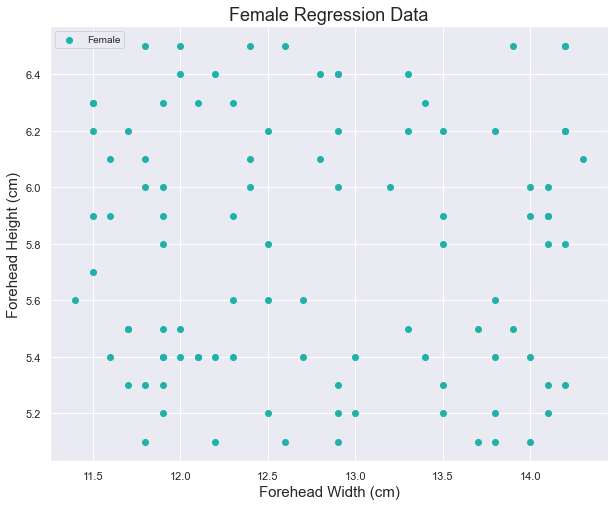

In [11]:
plt.figure(figsize = (10, 8))
plt.scatter(X, y, color = "lightseagreen", label = "Female")
plt.xlabel("Forehead Width (cm)", fontsize = 15)
plt.ylabel("Forehead Height (cm)", fontsize = 15)
plt.title("Female Regression Data", fontsize = 18)
plt.legend(fontsize = 10)
plt.show()

As seen above, the data points in this plot match those in the first plot further above!

----------------------------------------------------------------------------------------------------------------------------------------------------------
With the newly formatted data, X and y, we now need to instantiate the Single Neuron class, and train it by calling the train method!

NOTE: to do this, we will pass it the linear activation function as seen below.

In [12]:
def linear_activation(z): #defining the activation function
    return z

node = Single_Neuron(linear_activation) # instantiating the class by passing in the activation function and assigning it the variable node
node.train(X, y, alpha = 0.0001, epochs = 5)

Lets see a visualization of the prediction. We will define a domain over which to plot the prediction.

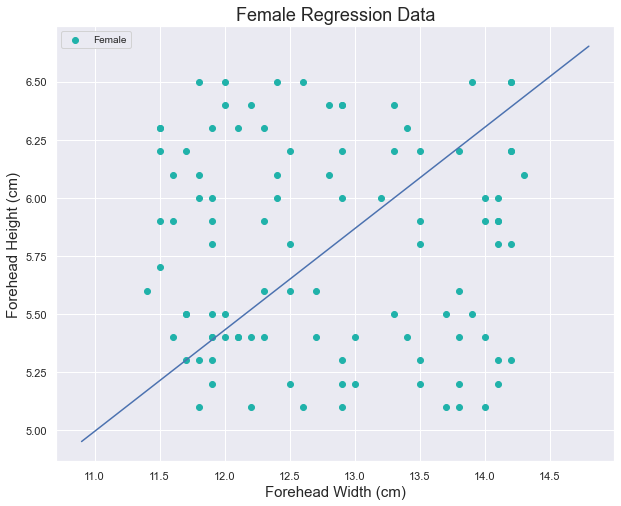

In [16]:
domain = np.linspace(np.min(X) - .5, np.max(X) + .5, 100) # domain to plot prediction over
                                                          # np.linspace: returns array with evenly spaced numbers based on a given interval (100)

plt.figure(figsize = (10, 8))
plt.scatter(X, y, color = "lightseagreen", label = "Female")
plt.plot(domain, node.predict(domain.reshape(-1, 1))) # domain has to be reshaped into a column vector
plt.xlabel("Forehead Width (cm)", fontsize = 15)
plt.ylabel("Forehead Height (cm)", fontsize = 15)
plt.title("Female Regression Data", fontsize = 18)
plt.legend(fontsize = 10)
plt.show()

Despite a small learning rate (alpha = 0.0001) and number of epochs (5), the prediction is fairly well. Moreover, although we initialized the weights to be random, the line above does not appear to be random.

----------------------------------------------------------------------------------------------------------------------------------------------------------
To verify our prediction is indeed not random, we can see a plot of our errors attribute during training! This will allow us to visualize how the Mean-Squared Error is changing after each epoch.

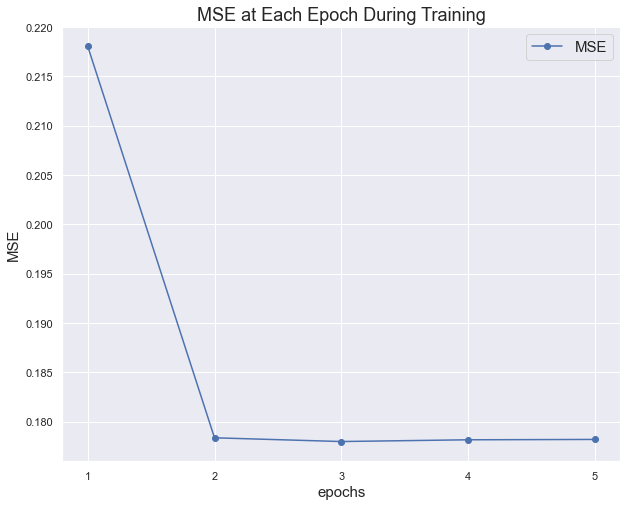

In [18]:
plt.figure(figsize = (10, 8))
plt.plot(range(1, len(node.errors_) + 1), # plotting the range of the values in the list "errors_" + 1
         node.errors_,                    # and the actual Mean-Squared errors
         marker = "o",
         label = "MSE")
plt.xlabel("epochs", fontsize = 15)
plt.ylabel("MSE", fontsize = 15)
plt.xticks(range(1, len(node.errors_) + 1))
plt.legend(fontsize = 15)
plt.title("MSE at Each Epoch During Training", fontsize = 18)
plt.show()

Based on the results of the plot above, one can see that it is indeed learning! The MSE dropped below 0.180 after only one epoch, and remained low for the remaining epochs. 

----------------------------------------------------------------------------------------------------------------------------------------------------------
Next, another instantiation of the Single Neuron will be made, this time with the same learning rate (0.0001), but a greater number of epochs to ensure our results above are accurate. Moreover, we will make a direct comparison of the plots for the regression data with the MSE using the subplots method.

Text(0.5, 1.0, 'MSE Error at Each Epoch During Training')

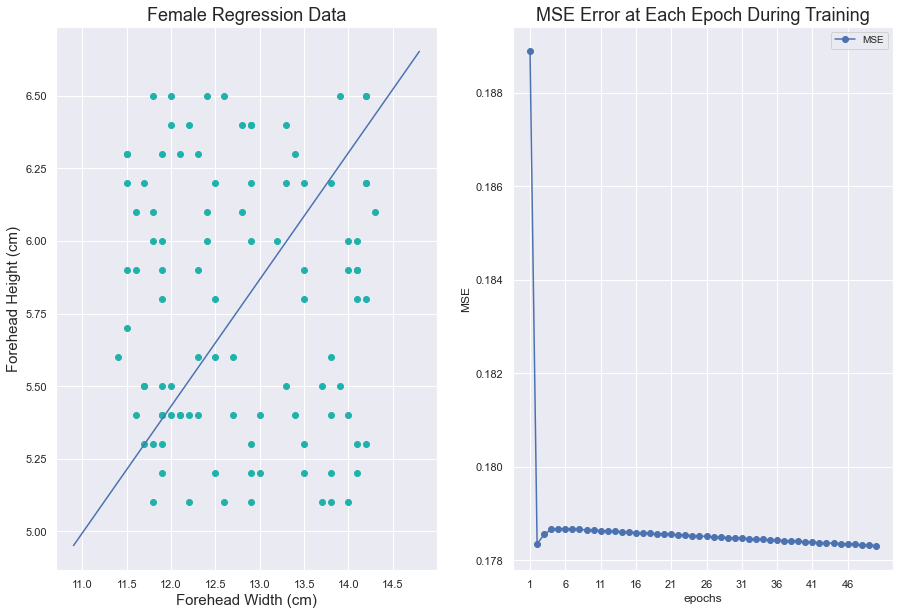

In [19]:
node = Single_Neuron(linear_activation)
node.train(X, y, alpha = .0001, epochs = 50)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,10)) # subplots allow for seperate plots to be show side-by-side

ax1.scatter(X, y, color = "lightseagreen")            # first (regression) plot
ax1.plot(domain, node.predict(domain.reshape(-1, 1)))
ax1.set_xlabel("Forehead Width (cm)", fontsize = 15)
ax1.set_ylabel("Forehead Height (cm)", fontsize = 15)
ax1.set_title("Female Regression Data", fontsize = 18)

ax2.plot(range(1, len(node.errors_) + 1),             # second (MSE) plot
         node.errors_,
         marker = "o",
         label = "MSE")
ax2.set_xlabel("epochs")
ax2.set_ylabel("MSE")
ax2.set_xticks(range(1, len(node.errors_) + 1, 5))
ax2.legend(fontsize = 10)
ax2.set_title("MSE Error at Each Epoch During Training", fontsize = 18)

Looking at the Regression Data plot, we can see that the prediction line splits the data in half! Additionally, the MSE plot, again, dropped significantly after only one epoch. Although there was a small increase in the second and third epoch, it begin to steadly decrease afterwards. This small increase followed by the subsequent consistent decrease indicates it has learned!  

----------------------------------------------------------------------------------------------------------------------------------------------------------
Lastly, we will look at the results from using different learning rates

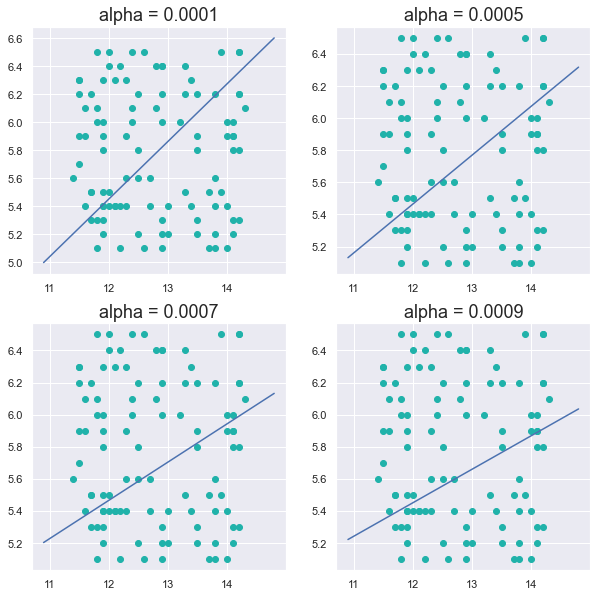

In [24]:
alphas = [0.0001, 0.0005, 0.0007, 0.0009] # different learning rates 

domain = np.linspace(np.min(X) - .5, np.max(X) + .5, 100) # domain to plot prediction over

fig, axs = plt.subplots(2, 2, figsize=(10,10)) # Calling the subplots method for plotting a grid of figures

for ax, alpha in zip(axs.flat, alphas): # Loop over the axes and alpha values
    node = Single_Neuron(linear_activation)
    node.train(X, y, alpha = alpha, epochs = 1000)
    ax.plot(domain, node.predict(domain.reshape(-1, 1)))
    ax.scatter(X, y, color = "lightseagreen")
    ax.set_title(f"alpha = {alpha}", fontsize = 18)

Based on the results above, the learning rate, alpha = 0.001, is the most suitable for this dataset.